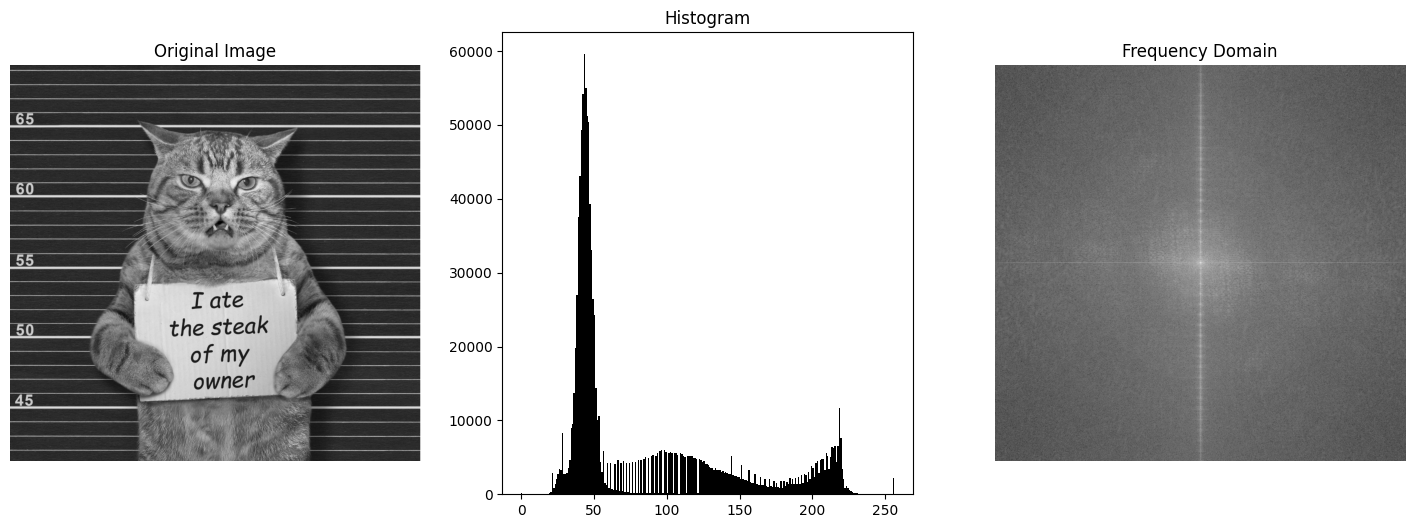

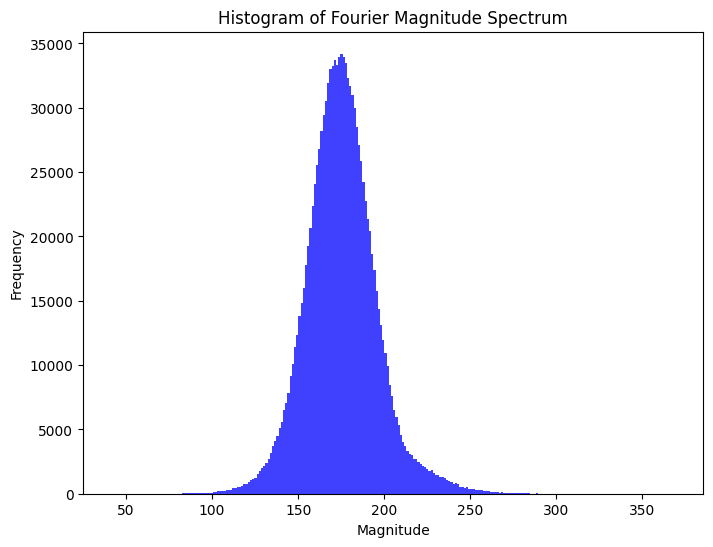

In [8]:
import cv2  # OpenCV 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, fftshift, ifftshift    # 用於頻率域轉換

# 讀取圖片，使用灰階模式
image = cv2.imread('F:\Code\Digital-Image-Processing\Code\Resources\Data\cat.jpg', cv2.IMREAD_GRAYSCALE)

# 顯示原圖
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 顯示直方圖
plt.subplot(1, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram')

# 計算並顯示頻率域圖
f_transform = fft2(image)  # 進行2D快速傅立葉變換
f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain')
plt.axis('off')

# 顯示所有圖像
plt.show()

# 顯示傅立葉頻譜的直方圖
plt.figure(figsize=(8, 6))
plt.hist(magnitude_spectrum.ravel(), bins=256, color='blue', alpha=0.75)
plt.title('Histogram of Fourier Magnitude Spectrum')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

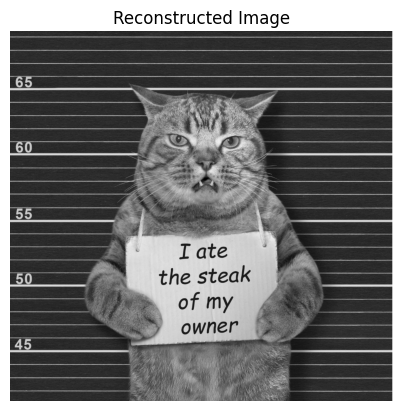

In [10]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

# 逆傅立葉變換將頻譜轉換回空間域
f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
image_back = np.abs(image_back)  # 取實部，得到重建圖像

plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

In [9]:
def basic_array_info(array):
    print("Type: ", type(array))
    print("Shape: ", array.shape)
    print("Max: ", array.max())
    print("Min: ", array.min())
    print("Mean: ", array.mean())

# basic_array_info(f_transform)

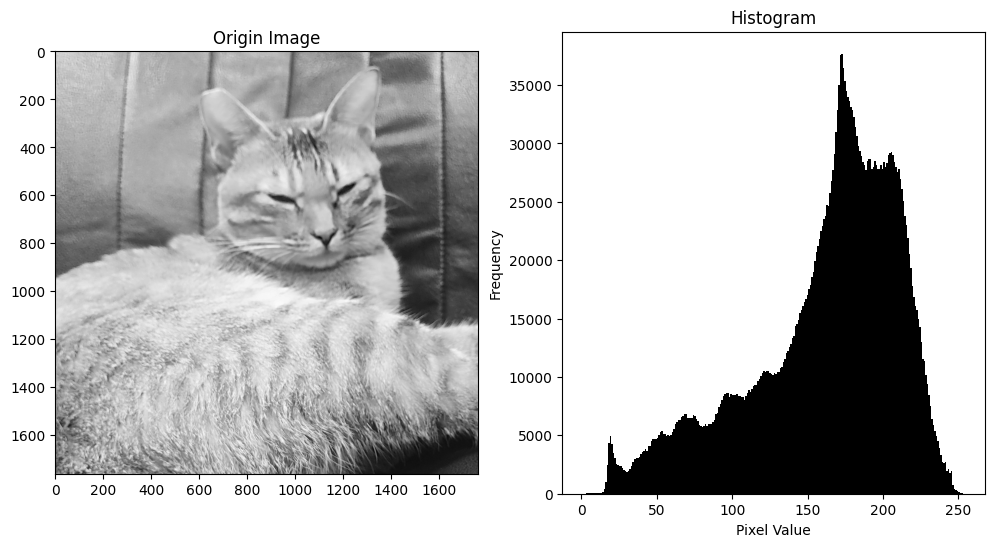

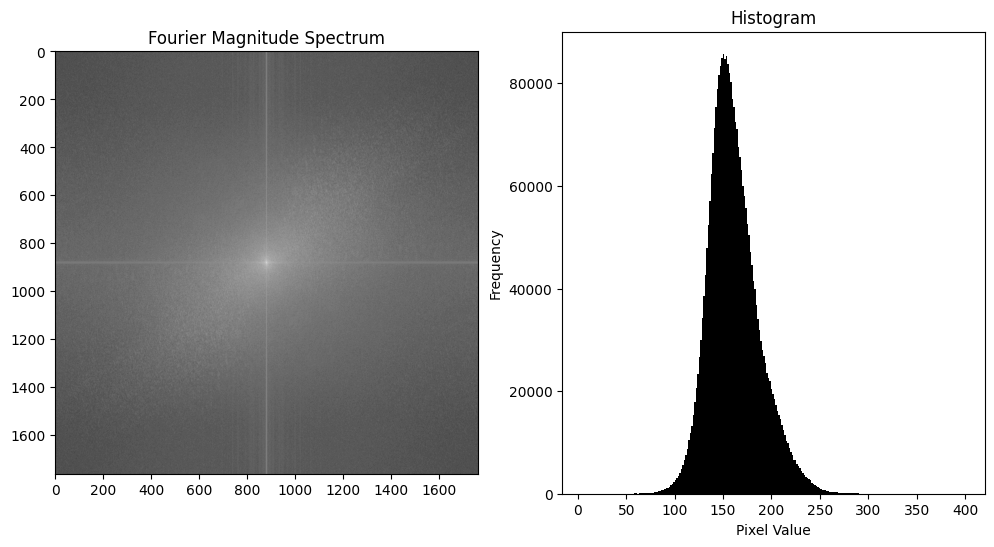

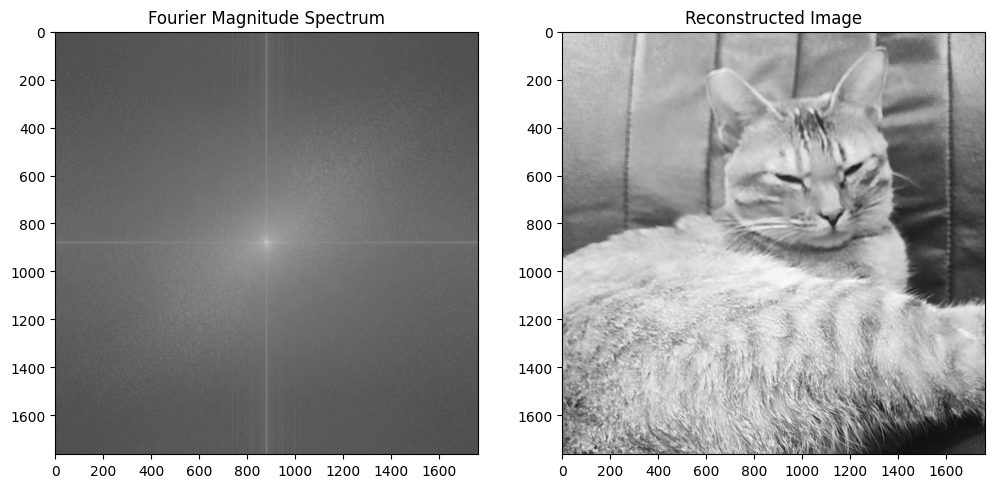

array([[209., 210., 212., ..., 178., 176., 173.],
       [212., 212., 213., ..., 174., 172., 171.],
       [212., 212., 213., ..., 176., 175., 173.],
       ...,
       [126., 128., 130., ...,  64.,  65.,  66.],
       [125., 127., 130., ...,  65.,  66.,  67.],
       [126., 126., 129., ...,  66.,  67.,  69.]])

In [35]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

def histogram_show(image, title):
    """顯示圖片的直方圖"""
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    # plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

def fourier_show(image):
    """計算並顯示傅立葉頻譜和直方圖"""
    f_transform = fft2(image)  # 進行2D快速傅立葉變換
    f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度
    
    histogram_show(magnitude_spectrum, title='Fourier Magnitude Spectrum')
    
    return f_transform_shifted

def i_fourier_show(f_transform_shifted):
    """進行逆傅立葉變換並顯示重建的圖片"""
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))
    
    f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
    image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
    image_back = np.abs(image_back)  # 取實部，得到重建圖像

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Fourier Magnitude Spectrum")
    
    plt.subplot(1, 2, 2)
    plt.imshow(image_back, cmap='gray')
    plt.title('Reconstructed Image')
    # plt.axis('off')
    plt.show()
    
    return image_back

# 讀取圖片，使用灰階模式
origin = cv2.imread('F:\Code\Digital-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 顯示原圖與其直方圖
histogram_show(origin, title='Origin Image')

# 計算傅立葉變換，顯示頻譜及其直方圖
f_image = fourier_show(origin)

# 逆傅立葉變換，顯示重建圖像
i_fourier_show(f_image)




In [36]:
basic_array_info(f_image)

Type:  <class 'numpy.ndarray'>
Shape:  (1763, 1763)
Max:  (502296255+0j)
Min:  (-36090844.61240741-34311826.644632705j)
Mean:  (209.00000000000003-1.9743272170214364e-14j)


In [17]:
1763 // 2

881

In [73]:
remain = 3
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(878, 884)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


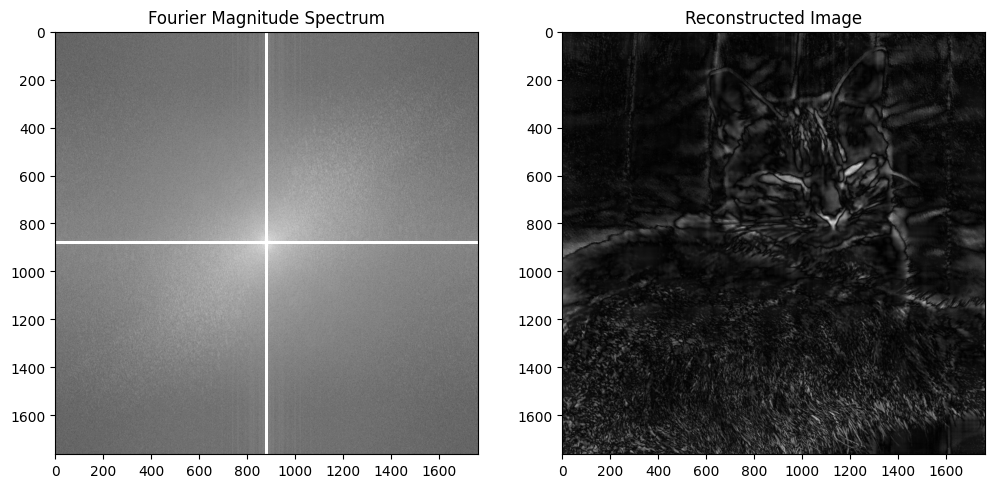

array([[15.44832916, 15.45167263, 15.7506224 , ...,  6.00823838,
         4.29680548,  2.04584709],
       [15.91115401, 15.87754129, 16.09381097, ...,  3.01178576,
         2.22267535,  2.32417356],
       [16.02030405, 15.98640413, 16.20604625, ...,  4.50502745,
         3.71069833,  2.1470651 ],
       ...,
       [22.4681737 , 24.09024331, 25.45792272, ...,  8.43450437,
         7.55411856,  6.96485275],
       [19.52636884, 21.04006158, 23.19063901, ...,  9.66892823,
         8.75052413,  8.13660958],
       [17.99296886, 17.87575663, 19.86620798, ..., 11.29527187,
        10.35563769,  8.93537714]])

In [74]:
f_cp = f_image.copy()

f_cp[left:right, :] = 0
f_cp[:, left:right] = 0

i_fourier_show(f_cp)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


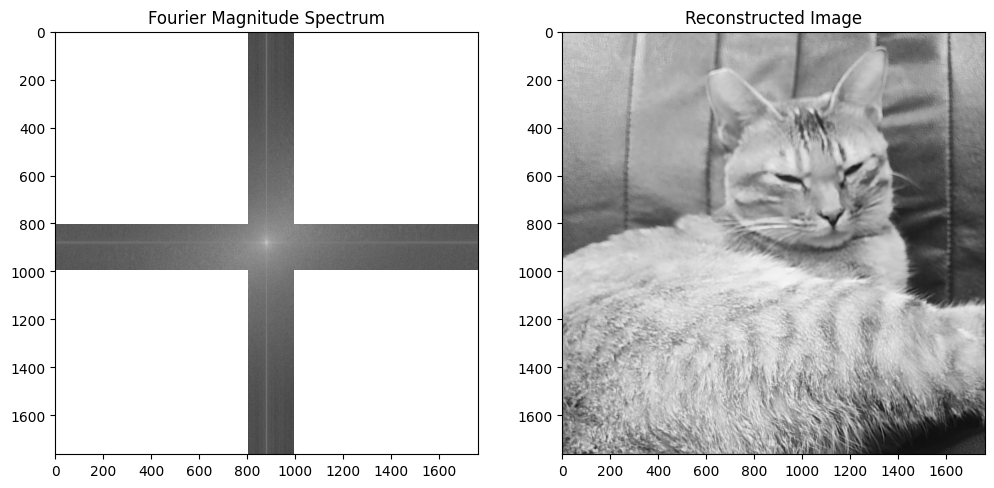

array([[215.57624341, 216.49083576, 217.29193069, ..., 172.34595145,
        170.80643136, 169.37562682],
       [212.81404502, 213.53840084, 213.88768013, ..., 174.04055789,
        171.89554623, 170.06158132],
       [211.77716265, 211.88601981, 211.4557124 , ..., 177.74781239,
        174.83275272, 172.29003828],
       ...,
       [125.83825116, 129.74856234, 135.47065306, ...,  64.55127007,
         66.06439938,  67.59349229],
       [123.39877425, 128.20432753, 134.39430558, ...,  63.82360717,
         65.24896771,  66.93676334],
       [120.69437061, 125.07783597, 130.31736137, ...,  65.75215959,
         66.66372873,  67.83780458]])

In [55]:
f_cp = f_image.copy()

f_cp[:800, :800] = 0
f_cp[:800, 1000:] = 0
f_cp[1000:, :800] = 0
f_cp[1000:, 1000:] = 0

i_fourier_show(f_cp)

In [65]:
remain = 5
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(876, 886)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


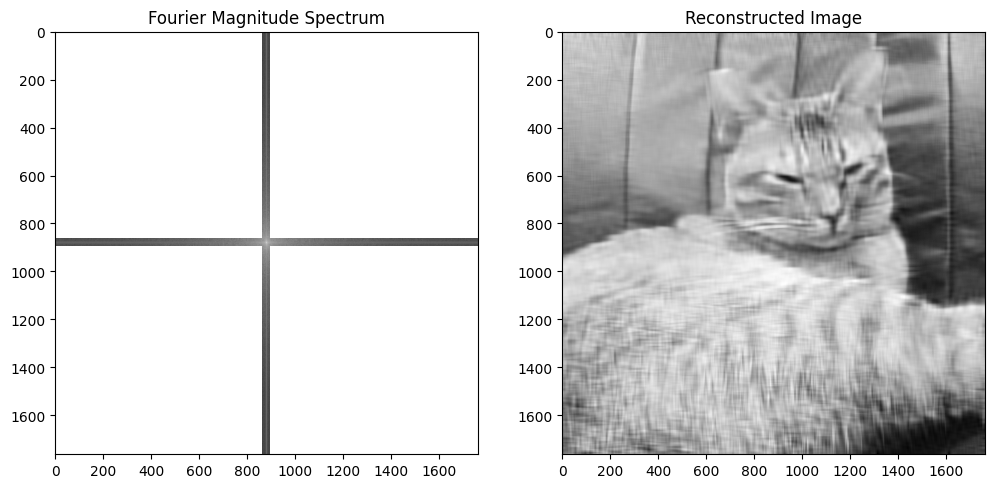

array([[203.4483822 , 202.78701341, 205.89158226, ..., 175.66705108,
        175.17056048, 174.55533117],
       [204.81479218, 204.16931641, 207.04493117, ..., 176.47571215,
        175.89585794, 175.22820104],
       [206.45142669, 205.84792842, 208.51926609, ..., 177.51458403,
        176.87803024, 176.18449829],
       ...,
       [ 99.39697872,  99.84852947, 104.81992086, ...,  70.28682389,
         71.07878812,  71.70206553],
       [103.90378438, 104.50350676, 109.37747185, ...,  73.69541695,
         74.55925306,  75.27844503],
       [109.45820956, 110.16522582, 114.89051048, ...,  78.28392722,
         79.19605985,  79.98162717]])

In [62]:
f_cp = f_image.copy()

f_cp[:left, :left] = 0
f_cp[:left, right:] = 0
f_cp[right:, :left] = 0
f_cp[right:, right:] = 0

i_fourier_show(f_cp)

In [78]:
remain = 1
left = 1763 // 2 - remain
right = 1763 // 2 + remain
left, right

(880, 882)

C:\Users\112033645\AppData\Local\Temp\ipykernel_10840\3159905693.py:34: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


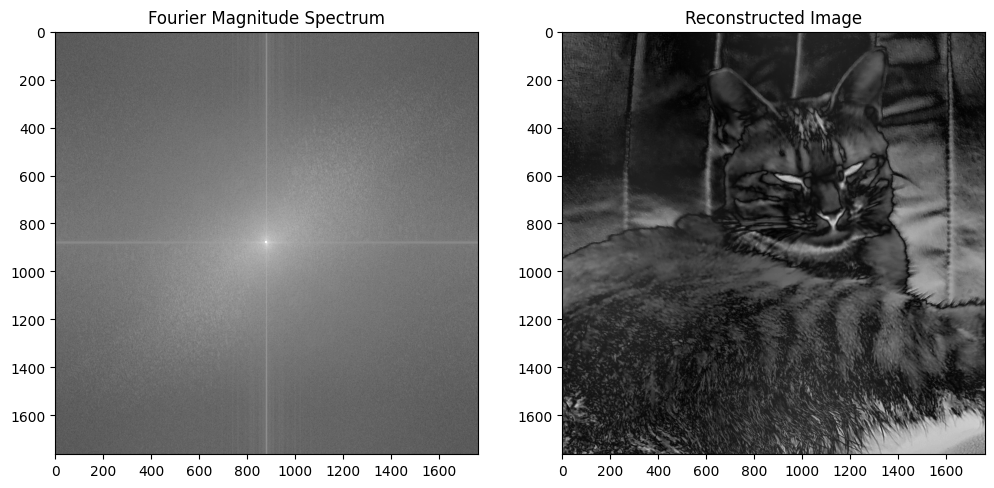

array([[55.23085025, 56.18710125, 58.1416032 , ..., 24.47198514,
        22.45141051, 19.44851989],
       [58.25283258, 58.21077333, 59.16703768, ..., 20.53750943,
        18.5259975 , 17.50417052],
       [58.27983181, 58.23781158, 59.19412959, ..., 22.54126621,
        21.51280394, 19.49869337],
       ...,
       [28.14262063, 26.20454543, 24.2694748 , ..., 89.87488031,
        88.92011079, 87.96548152],
       [29.10693876, 27.16757779, 24.24009733, ..., 88.84757943,
        87.89277842, 86.93811843],
       [28.0844699 , 28.13122013, 25.20156649, ..., 87.82023841,
        86.86540637, 84.91143815]])

In [79]:
f_cp = f_image.copy()

f_cp[left:right, left:right] = 0

i_fourier_show(f_cp)

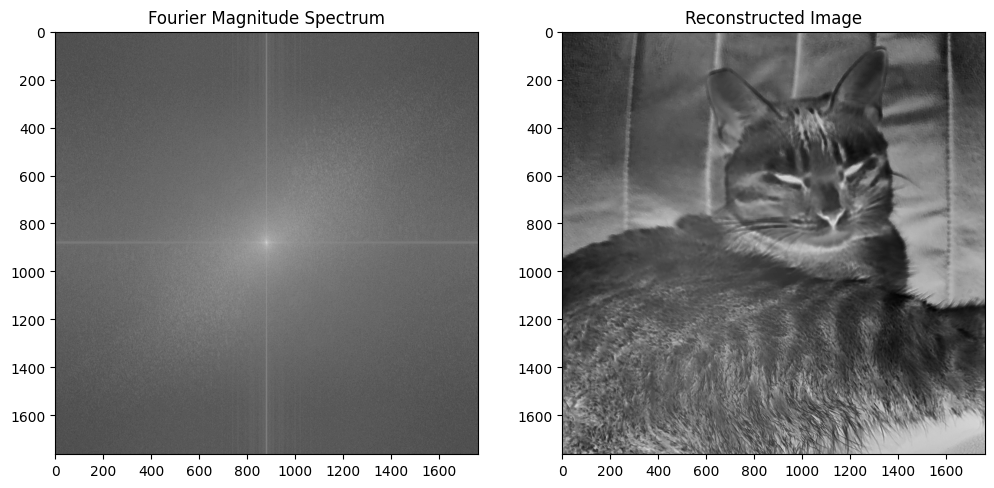

array([[ 98.94572823,  98.03893051,  96.13480503, ..., 129.62514679,
        131.71230201, 134.79850065],
       [ 95.89520751,  95.98617495,  95.07973312, ..., 133.56403392,
        135.65116352, 136.73959253],
       [ 95.83788815,  95.9287459 ,  95.02217748, ..., 131.50975274,
        132.59790247, 134.68509808],
       ...,
       [182.01648003, 180.10757015, 178.19893602, ..., 243.71953014,
        242.80851927, 241.89772916],
       [182.95964304, 181.05059359, 178.14251897, ..., 242.66423679,
        241.7531302 , 240.84224436],
       [181.90401572, 181.99354609, 179.08531812, ..., 241.60884922,
        240.69764688, 238.78703313]])

In [80]:
f_cp = f_image.copy()

f_cp[left:right, left:right] = -f_cp[left:right, left:right]

i_fourier_show(f_cp)

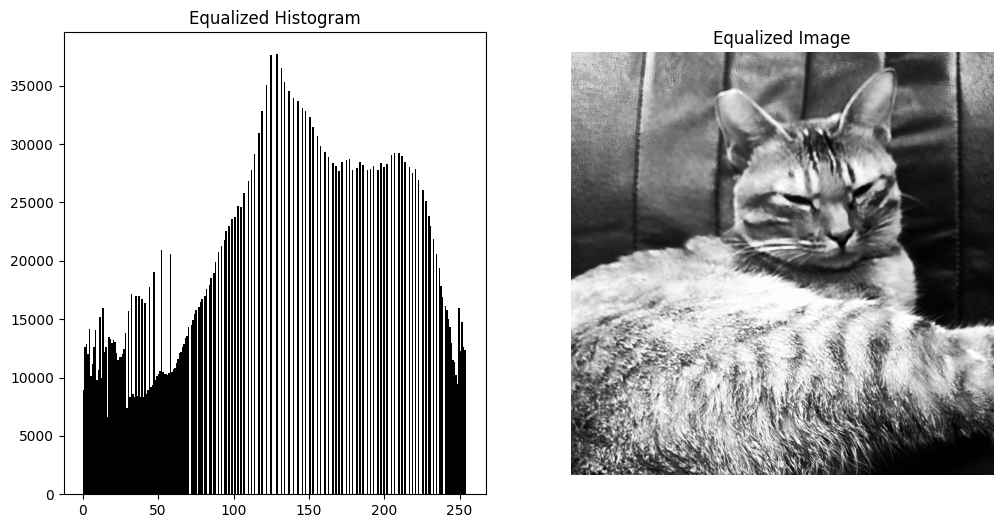

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_specification(image):
    # 計算原始圖像的直方圖
    original_hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # 計算累積直方圖
    cdf = original_hist.cumsum()
    cdf_normalized = cdf * original_hist.max() / cdf.max()  # 這一步是選擇性的，用來使CDF在顯示時更好看

    # 掩蔽CDF中的零值，避免在後續計算中出現問題
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

    # 使用累積直方圖來進行影像規範化
    image_equalized = cdf_final[image]

    # 顯示規範化後的直方圖和圖片
    plt.figure(figsize=(12, 6))
    
    # 均衡化後圖片的直方圖
    plt.subplot(1, 2, 1)
    plt.hist(image_equalized.ravel(), bins=256, color='black')
    plt.title('Equalized Histogram')
    
    # 均衡化後的圖片
    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()

# 讀取圖片，使用灰階模式
origin = cv2.imread('F:\\Code\\Digital-Image-Processing\\Code\\Resources\\Data\\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 呼叫直方圖自動處理函數來顯示結果
histogram_specification(origin)
